[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/bayesian_curve_fitting.ipynb)

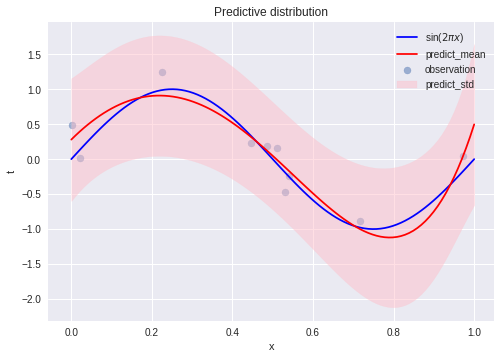

In [1]:
import matplotlib.pyplot as plt
import numpy as np


class PolynomialFeatures(object):

    def __init__(self, degree):
        self.degree = degree

    def transform(self, x):
        features = [x ** i for i in range(self.degree + 1)]
        return np.array(features).transpose()


class BayesianRegression(object):

    def __init__(self, alpha=0.1, beta=0.25):
        self.alpha = alpha
        self.beta = beta

    def fit(self, X, t):
        self.w_var = np.linalg.inv(
            self.alpha * np.identity(np.size(X, 1))
            + self.beta * X.T.dot(X))
        self.w_mean = self.beta * self.w_var.dot(X.T.dot(t))

    def predict(self, X):
        y = X.dot(self.w_mean)
        y_var = 1 / self.beta + np.sum(X.dot(self.w_var) * X, axis=1)
        y_std = np.sqrt(y_var)
        return y, y_std


def create_toy_data(func, low=0, high=1, size=10, sigma=1.):
    x = np.random.uniform(low, high, size)
    t = func(x) + np.random.normal(scale=sigma, size=size)
    return x, t


def main():

    def func(x):
        return np.sin(2 * np.pi * x)

    x, t = create_toy_data(func, low=0, high=1, size=10, sigma=0.25)
    plt.scatter(x, t, s=50, marker='o', alpha=0.5, label="observation")

    features = PolynomialFeatures(degree=5)

    regression = BayesianRegression(alpha=1e-3, beta=2)
    X = features.transform(x)
    regression.fit(X, t)

    x_test = np.linspace(0, 1, 100)
    X_test = features.transform(x_test)
    y, y_std = regression.predict(X_test)

    plt.plot(x_test, func(x_test), color='blue', label="sin($2\pi x$)")
    plt.plot(x_test, y, color='red', label="predict_mean")
    plt.fill_between(x_test, y - y_std, y + y_std,
                     color='pink', alpha=0.5, label="predict_std")
    plt.legend()
    plt.title("Predictive distribution")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.show()


if __name__ == '__main__':
    main()